In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import h5py

import pynbody

In [2]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rcParams['font.size']=12

In [3]:
data_path = "/home/ryan/Data"

In [4]:
f = pynbody.load(data_path + '/run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_2/snap_007.hdf5')
# h = pynbody.load(data_path + '/run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_2/fof_subhalo_tab_007.hdf5')
h = f.halos(subhalos=True)

f.physical_units()

/home/ryan/miniconda3/envs/work/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:761: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [6]:
pynbody.analysis.center(h[0])

<Transformation null, translate, offset_velocity>

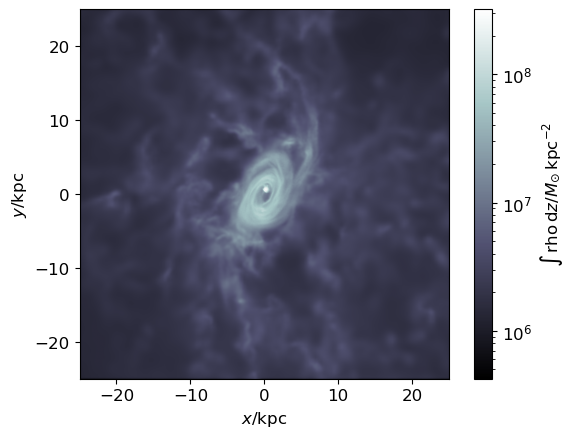

In [7]:
pynbody.plot.image(f.gas, width="50 kpc", units="Msol kpc^-2", cmap="bone")

/home/ryan/miniconda3/envs/work/lib/python3.12/site-packages/pynbody/array/__init__.py:361: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(ufunc, method, *inputs, **kwargs)


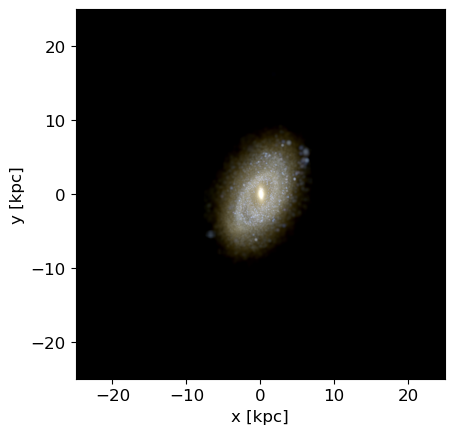

In [54]:
pynbody.plot.stars.render(f.st, width="50 kpc", mag_range=[18, 26])

In [72]:
f = pynbody.load(data_path + '/run_2cDM_811_DM_power00_sigma1_dir_0_Vkick20.00/snap_127.hdf5')
h = f.halos(subhalos=True)

f.physical_units()

pynbody.analysis.center(h[0])

/home/ryan/miniconda3/envs/work/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:761: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


<Transformation null, translate, offset_velocity>

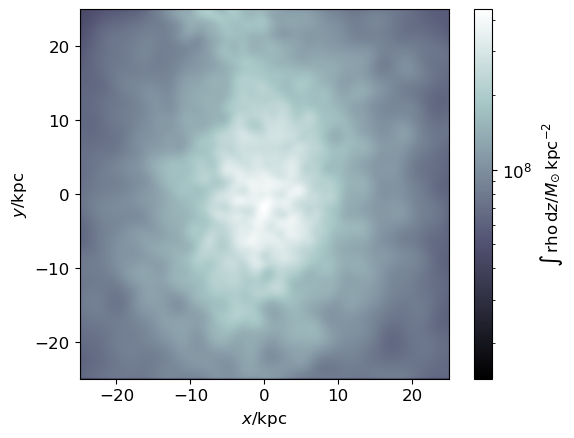

In [73]:
pynbody.plot.image(f.dm, width="50 kpc", units="Msol kpc^-2", cmap="bone")

In [55]:
snap_path = data_path + '/run_CDM_710_HY/snap_127.hdf5'
fof_path = data_path + '/run_CDM_710_HY/fof_subhalo_tab_127.hdf5'
with h5py.File(fof_path, 'r') as s, h5py.File(snap_path, "r") as f:
    test = s.get('Subhalo')
    print(test)
    print(test['SubhaloMass'])
    print(test['SubhaloVmaxRad'][0])

<HDF5 group "/Subhalo" (50 members)>
<HDF5 dataset "SubhaloMass": shape (174,), type "<f8">
35.8923245454339


In [7]:
snap_path = data_path + '/run_CDM_710_HY/snap_127.hdf5'
fof_path = data_path + '/run_CDM_710_HY/fof_subhalo_tab_127.hdf5'
with h5py.File(fof_path, 'r') as s, h5py.File(snap_path, "r") as f:
    print(f['Header'].attrs['NumPart_Total'])
    for n in f['Header'].attrs['NumPart_Total']:
        print(np.cbrt(n))
    print(s['Group/GroupMass'])
    print(s.get('Group'))
    test = s.get('Group')
    print(test['GroupMass'])

[2313708  114400 2190078       0    4734      13]
132.26233412812297
48.54472085833889
129.8633277638242
0.0
16.79098155421193
2.3513346877207577
<HDF5 dataset "GroupMass": shape (431,), type "<f8">
<HDF5 group "/Group" (25 members)>
<HDF5 dataset "GroupMass": shape (431,), type "<f8">


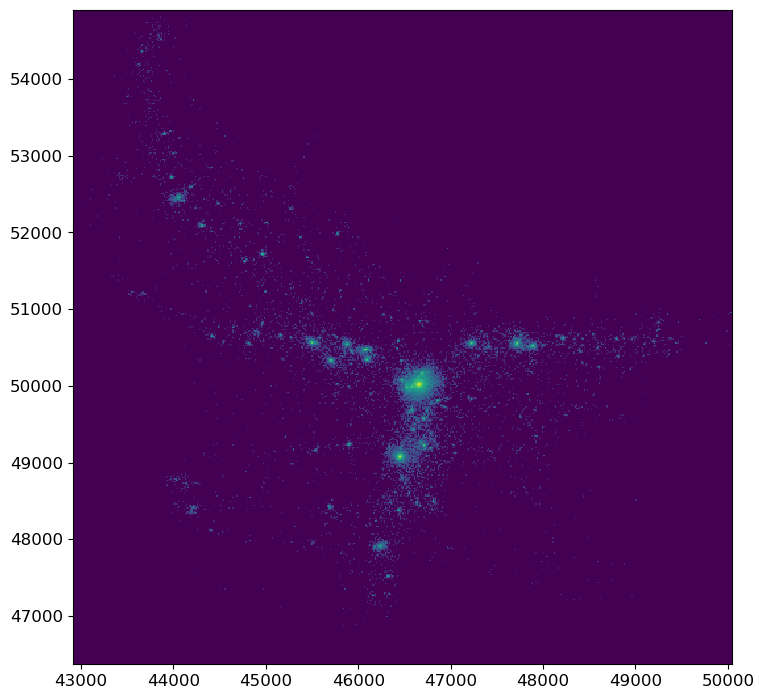

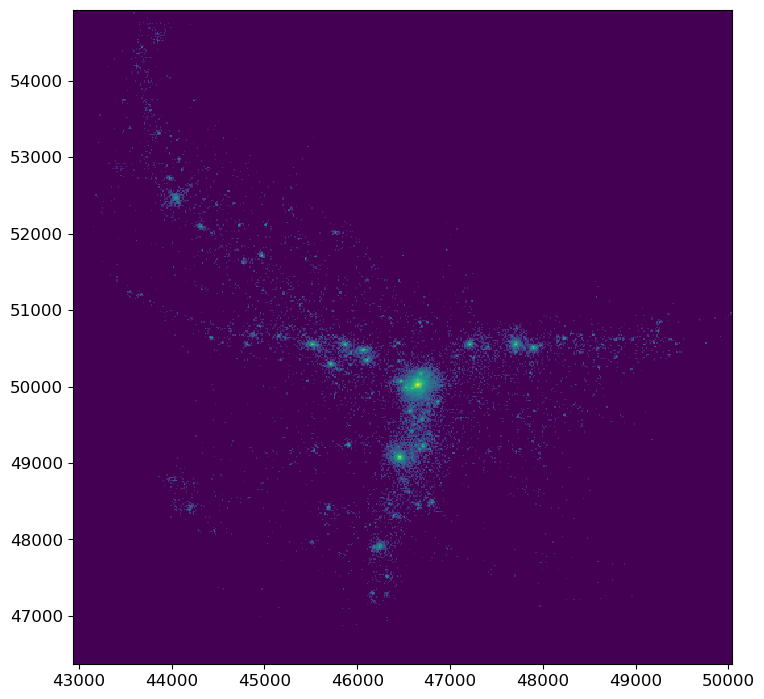

In [7]:
snap_path = data_path + '/run_CDM_710_HY/snap_127.hdf5'
fof_path = data_path + '/run_CDM_710_HY/fof_subhalo_tab_127.hdf5'
with h5py.File(fof_path, 'r') as s, h5py.File(snap_path, "r") as f:
    coords = f[f"PartType1/Coordinates"]
    average_z = np.mean(coords[:,2])
    std_z = np.std(coords[:,2])
    #masses = f[f"PartType1/Masses"][()]
    z_slice = (coords[:,2] < (average_z + std_z)) & (coords[:,2] > (average_z - std_z))

    x = coords[:,0][z_slice]
    y = coords[:,1][z_slice]
    #m = masses[z_slice]

#print(np.amax(x) - np.amin(x), np.amax(y) - np.amin(y))
Nbins=500
FIG_HEIGHT = 8.5
FIG_WIDTH = 8.5

FIGSIZE=[FIG_WIDTH,FIG_HEIGHT]
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.hist2d(x, y, norm=LogNorm(clip=True), bins=Nbins)
plt.show()


snap_path = data_path + '/run_2cDM_710_HY_power00_sigma1/snap_127.hdf5'
fof_path = data_path + '/run_2cDM_710_HY_power00_sigma1/fof_subhalo_tab_127.hdf5'

with h5py.File(fof_path, 'r') as s, h5py.File(snap_path, "r") as f:
    coords = f[f"PartType1/Coordinates"]
    average_z = np.mean(coords[:,2])
    std_z = np.std(coords[:,2])
    #masses = f[f"PartType2/Masses"][()]
    z_slice = (coords[:,2] < (average_z + std_z)) & (coords[:,2] > (average_z - std_z))

    x = coords[:,0][z_slice]
    y = coords[:,1][z_slice]
    #m = masses[z_slice]

fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.hist2d(x, y, norm=LogNorm(clip=True), bins=Nbins)
plt.show()

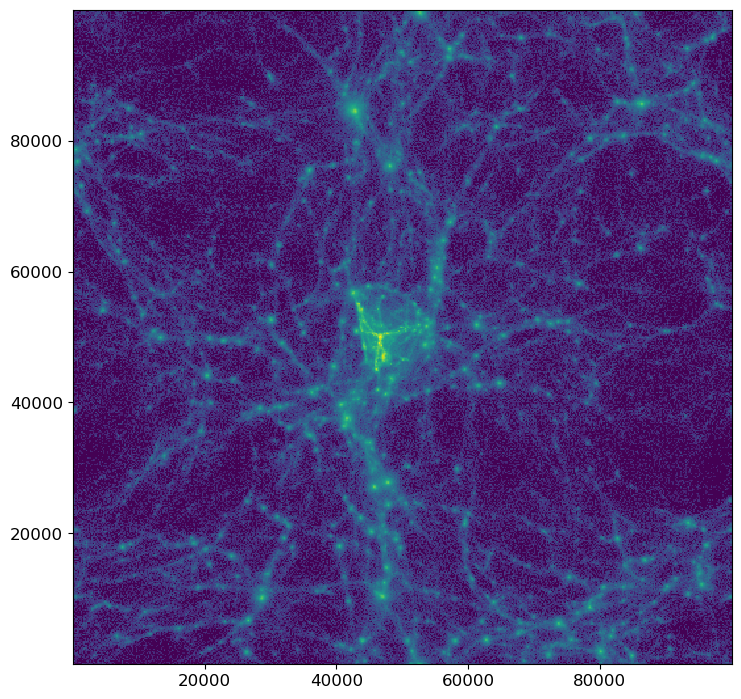

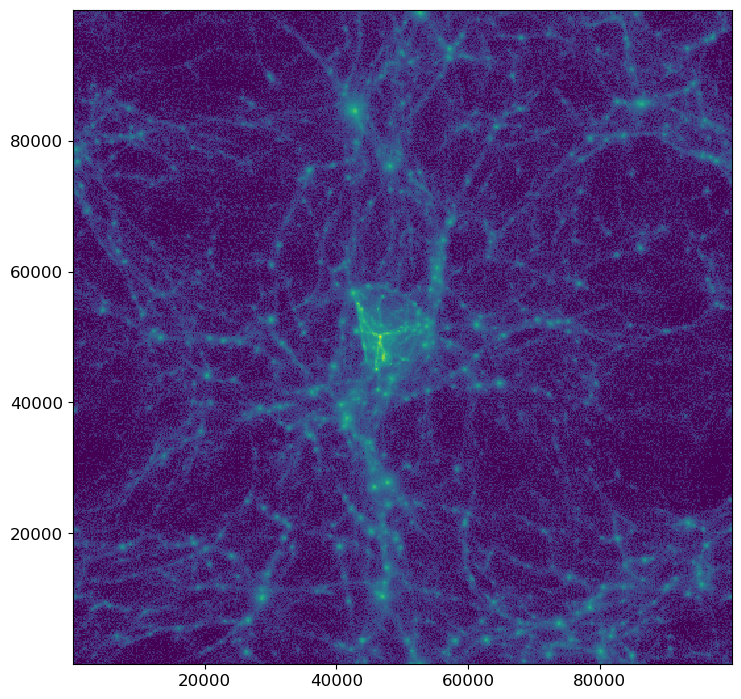

In [9]:
snap_path = data_path + '/run_CDM_710_HY/snap_127.hdf5'
fof_path = data_path + '/run_CDM_710_HY/fof_subhalo_tab_127.hdf5'
with h5py.File(fof_path, 'r') as s, h5py.File(snap_path, "r") as f:
    coords = f[f"PartType0/Coordinates"]
    average_z = np.mean(coords[:,2])
    std_z = np.std(coords[:,2])
    #masses = f[f"PartType1/Masses"][()]
    z_slice = (coords[:,2] < (average_z + std_z)) & (coords[:,2] > (average_z - std_z))

    x = coords[:,0][z_slice]
    y = coords[:,1][z_slice]
    #m = masses[z_slice]

#print(np.amax(x) - np.amin(x), np.amax(y) - np.amin(y))
Nbins=500
FIG_HEIGHT = 8.5
FIG_WIDTH = 8.5

FIGSIZE=[FIG_WIDTH,FIG_HEIGHT]
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.hist2d(x, y, norm=LogNorm(clip=True), bins=Nbins)
plt.show()


snap_path = data_path + '/run_2cDM_710_HY_power00_sigma1/snap_127.hdf5'
fof_path = data_path + '/run_2cDM_710_HY_power00_sigma1/fof_subhalo_tab_127.hdf5'

with h5py.File(fof_path, 'r') as s, h5py.File(snap_path, "r") as f:
    coords = f[f"PartType0/Coordinates"]
    average_z = np.mean(coords[:,2])
    std_z = np.std(coords[:,2])
    #masses = f[f"PartType2/Masses"][()]
    z_slice = (coords[:,2] < (average_z + std_z)) & (coords[:,2] > (average_z - std_z))

    x = coords[:,0][z_slice]
    y = coords[:,1][z_slice]
    #m = masses[z_slice]

fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.hist2d(x, y, norm=LogNorm(clip=True), bins=Nbins)
plt.show()